# Исследование популярного сервиса аренды самокатов GoFast

Описание проекта.
Предоставленны данные cервиса аренды самокатов GoFast. Данные о некоторых пользователях из нескольких городов, а также об их поездках. Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. В этом проекте проанализируем данные и проверим некоторые гипотезы, которые могут помочь бизнесу вырасти.

Сервисом можно пользоваться без подписки:
- абонентская плата отсутствует стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;

с подпиской Ultra: 
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

План работы:
- Загрузить данные
- Произвести предобработку данных. Проверить на пропуски значений, дубликаты, ошибки типов данных.
- Визуализировать и изучить обрботанные данные, выполнить первоначальные наблюдения.
- Произвести расчеты на основе полученных данных, выявить закономерности. Обьединить необходимые таблицы, столбцы, добавить новые
- Проверить необходимые гипотезы, сделать выводы.

In [55]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt 

## Загрузка данных

In [56]:
try:
    user = pd.read_csv('C:\\Users\\tema-\\Downloads\\Jupyter\\Doc_csv\\users_go.csv')
    rides = pd.read_csv('C:\\Users\\tema-\\Downloads\\Jupyter\\Doc_csv\\rides_go.csv')
    sub = pd.read_csv('C:\\Users\\tema-\\Downloads\\Jupyter\\Doc_csv\\subscriptions_go.csv') 
except:
    user = pd.read_csv('/datasets/users_go.csv')
    rides = pd.read_csv('/datasets/rides_go.csv')
    sub = pd.read_csv('/datasets/subscriptions_go.csv')
user.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [57]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [58]:
sub.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


В основных данных есть информация о пользователях, их поездках и подписках.
##### В таблице с пользователями есть информация:
- user_id	уникальный идентификатор пользователя
- name	имя пользователя
- age	возраст
- city	город
- subscription_type	тип подписки (free, ultra)
##### В таблице с поездками есть информация:
- user_id	уникальный идентификатор пользователя
- distance	расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до   момента, как он нажал кнопку «Завершить поездку»
- date	дата совершения поездки
##### В таблице с подписками есть информация:
- subscription_type	тип подписки
- minute_price	стоимость одной минуты поездки по данной подписке
- start_ride_price	стоимость начала поездки
- subscription_fee	стоимость ежемесячного платежа

## Предобработка данных

### Проверим тип данных

In [59]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [60]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [61]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


Наименования правильные, тип с датой поменяем на datetime

In [62]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

In [63]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Порядок

Создадим новый столбец с номером месяца

In [64]:
rides['date_month'] = rides['date'].dt.month
rides.head()

,user_id,distance,duration,date,date_month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [65]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18068 non-null  int64         
 1   distance    18068 non-null  float64       
 2   duration    18068 non-null  float64       
 3   date        18068 non-null  datetime64[ns]
 4   date_month  18068 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 635.3 KB


Проверим есть ли данные, за дргуие года, чтобы не ошибиться в расчетах.

In [66]:
rides['date_year'] = rides['date'].dt.year
rides['date_year'].unique()

array([2021])

### Проверим таблицы на пропуски значений

In [67]:
user.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [68]:
rides.isna().sum()

user_id       0
distance      0
duration      0
date          0
date_month    0
date_year     0
dtype: int64

In [69]:
sub.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропусков нет.

### Проверим на дубликаты.

In [70]:
user.duplicated().sum()

31

Из 1565 строк это несущественное количество, удалим эти строки

In [71]:
user = user.drop_duplicates().reset_index()
user.duplicated().sum()

0

In [72]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              1534 non-null   int64 
 1   user_id            1534 non-null   int64 
 2   name               1534 non-null   object
 3   age                1534 non-null   int64 
 4   city               1534 non-null   object
 5   subscription_type  1534 non-null   object
dtypes: int64(3), object(3)
memory usage: 72.0+ KB


In [73]:
rides.duplicated().sum()

0

In [74]:
sub.duplicated().sum()

0

## Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях.

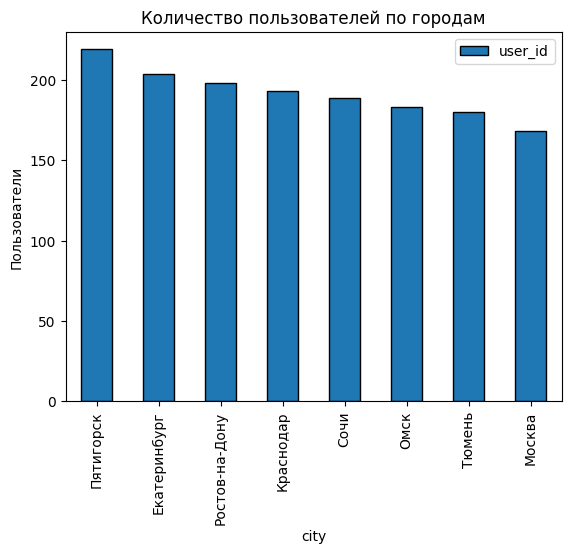

In [75]:
user.pivot_table(index='city',
                 values='user_id', 
                 aggfunc='count').sort_values('user_id', ascending=False).plot(kind='bar', ec='black')
plt.ylabel('Пользователи')
plt.title('Количество пользователей по городам');            

In [76]:
user.groupby('city')['user_id'].count().sort_values(ascending=False)

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: user_id, dtype: int64

По всем городам примерно одинаковое количество пользователей из полученных данных, однако Пятигорск оказывается в большинстве 219 пользователей, Москва занимает последнее место из 168 пользователей.

Соотношение пользователей с подпиской и без подписки.

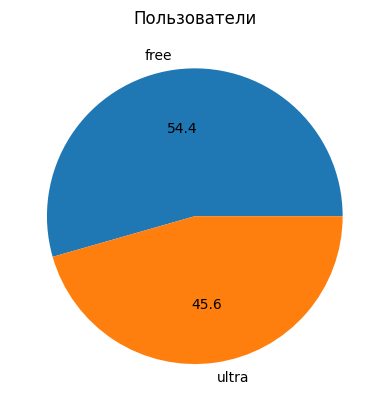

In [77]:
user.groupby('subscription_type')['user_id'].count().plot.pie(autopct="%.1f")
plt.title('Пользователи')
plt.ylabel('');

54.4% пользователей с уровнем подписки **free**.

Bозраст пользователей

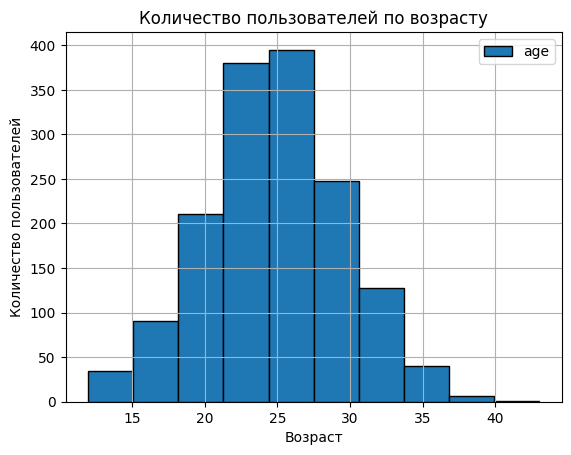

In [78]:
user.pivot_table(index='user_id', values='age').plot(xlabel='Возраст',
                                                     ylabel='Количество пользователей',
                                                     kind='hist',
                                                     ec='black',
                                                     grid=True);
plt.title('Количество пользователей по возрасту');

In [79]:
user['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Основной диапазон пользователей находится в промежутке от 22 до 28лет.

Расстояние, которое пользователь преодолел за одну поездку

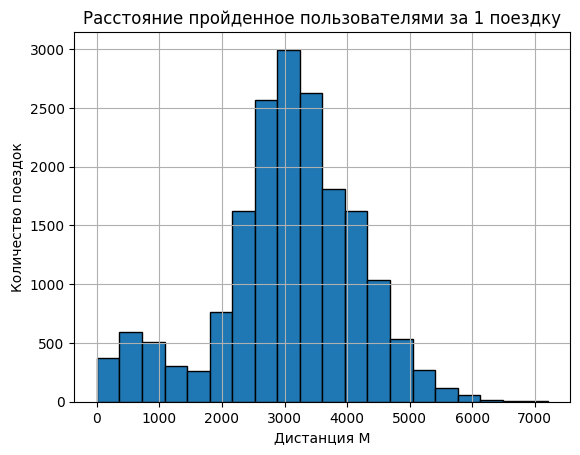

In [80]:
rides['distance'].plot(xlabel='Дистанция М',
                       ylabel='Количество поездок',
                       kind='hist',
                       bins=20,
                       ec='black',
                       grid=True);
plt.title('Расстояние пройденное пользователями за 1 поездку');

Обратим внимание на пик данных в районе 1000м, похоже на некорректную запись в столбце distance - исследуем это явление.

In [81]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

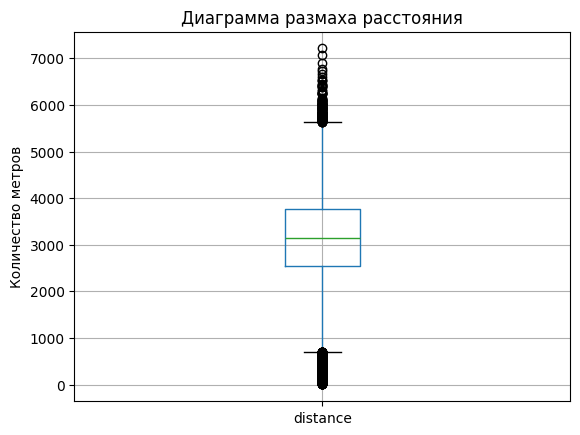

In [82]:
rides.boxplot('distance')
plt.title('Диаграмма размаха расстояния')
plt.xlabel('')
plt.ylabel('Количество метров');

In [83]:
rides.query('distance < 1500').count()

user_id       1796
distance      1796
duration      1796
date          1796
date_month    1796
date_year     1796
dtype: int64

Количество строк до 1500м 1796, конечно это 10% от общих данных, но боюсь, что такие значения могут сильно повлиять на средние показатели расчетов, в отдельных расчетах принять во внимание, этот факт. 

Построим гистограмму без "выбросов".

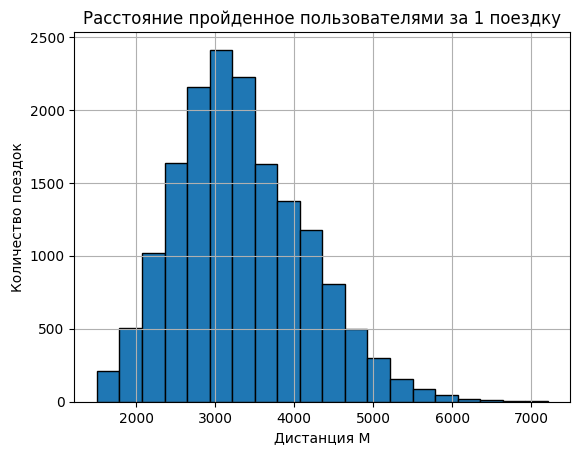

In [84]:
rides.query('distance > 1500')['distance'].plot(xlabel='Дистанция М',
                       ylabel='Количество поездок',
                       kind='hist',
                       bins=20,
                       ec='black',
                       grid=True);
plt.title('Расстояние пройденное пользователями за 1 поездку');

In [85]:
rides.query('distance > 1500')['distance'].describe()

count    16272.000000
mean      3331.889043
std        826.722577
min       1502.431070
25%       2742.576736
50%       3239.972305
75%       3874.561063
max       7211.007745
Name: distance, dtype: float64

В итоге получаем диапазон расстояний каждой поездки от 2,7км до 3,8км для каждой поездки.

Продолжительность поездок в минутах

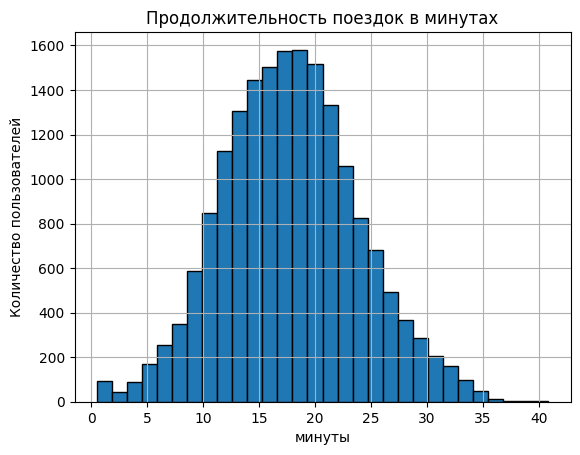

In [86]:
rides['duration'].plot(xlabel='минуты',
                       ylabel='Количество пользователей',
                       kind='hist',
                       bins=30,
                       ec='black',
                       grid=True)
plt.title('Продолжительность поездок в минутах');

In [87]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Популярностью пользуются поездки продолжительностью от 13 до 21 минут.

##  Объединение данных

Объединим данные о пользователях, поездках и подписках в один датафрейм

In [88]:
df = user.merge(rides, on='user_id')
df = df.merge(sub, on='subscription_type')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              18068 non-null  int64         
 1   user_id            18068 non-null  int64         
 2   name               18068 non-null  object        
 3   age                18068 non-null  int64         
 4   city               18068 non-null  object        
 5   subscription_type  18068 non-null  object        
 6   distance           18068 non-null  float64       
 7   duration           18068 non-null  float64       
 8   date               18068 non-null  datetime64[ns]
 9   date_month         18068 non-null  int32         
 10  date_year          18068 non-null  int32         
 11  minute_price       18068 non-null  int64         
 12  start_ride_price   18068 non-null  int64         
 13  subscription_fee   18068 non-null  int64         
dtypes: dat

In [89]:
df.isna().sum()

index                0
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
date_month           0
date_year            0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [90]:
df.duplicated().sum()

0

In [91]:
df.head()

,index,user_id,name,age,city,subscription_type,distance,duration,date,date_month,date_year,minute_price,start_ride_price,subscription_fee
0,0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,2021,6,0,199
1,0,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,2021,6,0,199
2,0,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,2021,6,0,199
3,0,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,2021,6,0,199
4,0,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,2021,6,0,199


In [92]:
df.shape

(18068, 14)

После объединения таблиц, все типы данных указаны корректно, дубликатов нет, пропусков значений нет, также количество строк соответствует исходному набору данных, количество записей прежнее.

 Создадим ещё два датафрейма о пользователях без подписки и о пользователях с подпиской.

In [93]:
df_sub = df[df['subscription_type'] == 'ultra'].reset_index(drop=True) 
df_sub.head()

,index,user_id,name,age,city,subscription_type,distance,duration,date,date_month,date_year,minute_price,start_ride_price,subscription_fee
0,0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,2021,6,0,199
1,0,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,2021,6,0,199
2,0,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,2021,6,0,199
3,0,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,2021,6,0,199
4,0,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,2021,6,0,199


In [94]:
df_nsub = df[df['subscription_type'] == 'free'].reset_index(drop=True) 
df_nsub.head()

,index,user_id,name,age,city,subscription_type,distance,duration,date,date_month,date_year,minute_price,start_ride_price,subscription_fee
0,699,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,2021,8,50,0
1,699,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,2021,8,50,0
2,699,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,2021,8,50,0
3,699,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,2021,8,50,0
4,699,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,2021,8,50,0


##### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

Расстояние для пользователей с подпиской в диапазоне от 2873 до 3616 метров.

In [95]:
df_sub['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

Расстояние для пользователей без подписки от 2607 до 3988 метров.

In [96]:
df_nsub['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

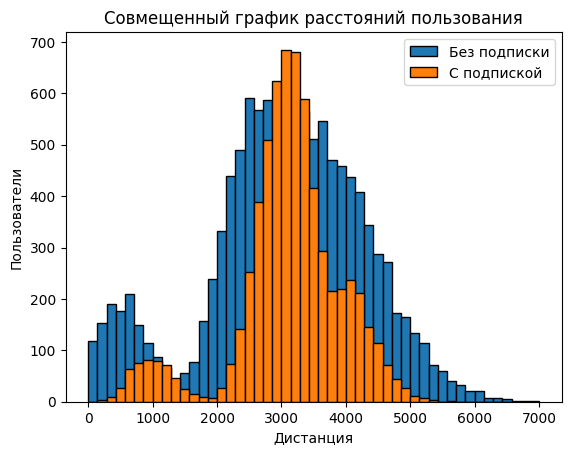

In [97]:
bins = np.linspace( 0 ,7000 )
plt.hist(df_nsub['distance'], bins, label=['Без подписки'] ,ec='black')
plt.hist(df_sub['distance'], bins, label=['С подпиской'],ec='black')
plt.legend(loc='upper right')
plt.xlabel('Дистанция')
plt.ylabel('Пользователи')
plt.title('Совмещенный график расстояний пользования')
plt.show()

Дистанция пользователей по медиане не особо отличается с подпиской 3283 на 3360 без подписки. Большим диапазоном расстояния обладает группа пользователей без подписки от 0,1км  до  7,2км. Поездки до 500м чаще встречаются у пользователей без подписки, возможно возникают какие-то проблемы при аренде самокатов в приложении. 

Время сессии для пользователей с подпиской в диапазоне от 15 до 22 минут.

In [98]:
df_sub['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

Время сессии для пользователей без подписки 

In [99]:
df_nsub['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

Время пользования для пользователей без подписки составляет диапазон от 12 до 21 минуты.
Время пользования до 3 минут, скорее всего ошибки пользователей начала поздки, либо сбои в программе, необходимо уточнить этот вопрос у коллег, чтобы не было влияния на средние показатели. Пока будем использовать, эти данные необходимы в подсчете выручки.

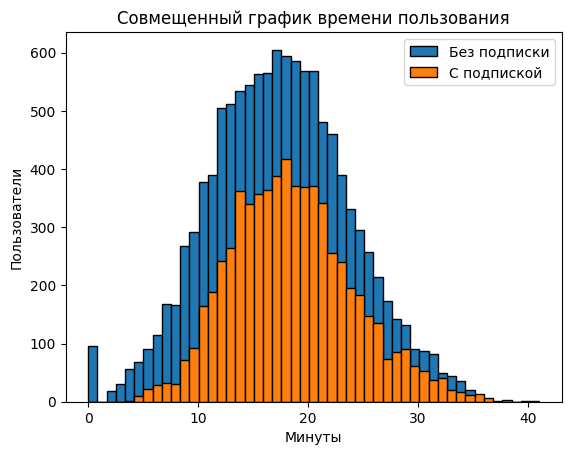

In [100]:
bins = np.linspace( 0,41 )
plt.hist(df_nsub['duration'], bins, label=['Без подписки'], ec='black')
plt.hist(df_sub['duration'], bins, label=['С подпиской'], ec='black')
plt.legend(loc='upper right')
plt.xlabel('Минуты')
plt.ylabel('Пользователи')
plt.title('Совмещенный график времени пользования')
plt.show()

По времени использования самокатов пользователи с подпиской имеют больший разброс от 3 до 40 минут.
Медиана времени у групп практически одинаковая 17,3 на 17,5 минут. 
в целом графики имеют схожее распределение по времени использования.

## Подсчёт выручки

 Создадим датафрейм с агрегированными данными о поездках с суммарным расстоянием, количеством поездок и суммарным временем для каждого пользователя за каждый месяц.

Приведем к целому числу продолжительность поездки в большую сторону

In [101]:
df['duration'] = df['duration'].apply(np.ceil) 

In [102]:
df_ag = df.pivot_table(index = ['user_id', 
                                'date_month',
                                'subscription_type',
                                'minute_price',
                                'subscription_fee', 
                                'start_ride_price'],
                       values = ['distance', 'duration','date'],
                       aggfunc = ({'distance':'sum','duration':'sum','date':'count'}))
df_ag = df_ag.reset_index()
df_ag

,user_id,date_month,subscription_type,minute_price,subscription_fee,start_ride_price,date,distance,duration
0,1,1,ultra,6,199,0,2,7027.511294,42.0
1,1,4,ultra,6,199,0,1,754.159807,7.0
2,1,8,ultra,6,199,0,2,6723.470560,46.0
3,1,10,ultra,6,199,0,2,5809.911100,32.0
4,1,11,ultra,6,199,0,3,7003.499363,56.0
...,...,...,...,...,...,...,...,...,...
11326,1534,6,free,8,0,50,2,3409.468534,26.0
11327,1534,8,free,8,0,50,2,7622.453034,48.0
11328,1534,9,free,8,0,50,1,4928.173852,23.0
11329,1534,11,free,8,0,50,4,13350.015305,78.0


В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. 

Добавим столбец **profit** с помесячной выручкой каждого пользователя ежемесячно.

In [103]:
df_ag['profit'] = ( df_ag['duration']*df_ag['minute_price']
                   +df_ag['subscription_fee']
                   +df_ag['date']*df_ag['start_ride_price'])
df_ag

,user_id,date_month,subscription_type,minute_price,subscription_fee,start_ride_price,date,distance,duration,profit
0,1,1,ultra,6,199,0,2,7027.511294,42.0,451.0
1,1,4,ultra,6,199,0,1,754.159807,7.0,241.0
2,1,8,ultra,6,199,0,2,6723.470560,46.0,475.0
3,1,10,ultra,6,199,0,2,5809.911100,32.0,391.0
4,1,11,ultra,6,199,0,3,7003.499363,56.0,535.0
...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,free,8,0,50,2,3409.468534,26.0,308.0
11327,1534,8,free,8,0,50,2,7622.453034,48.0,484.0
11328,1534,9,free,8,0,50,1,4928.173852,23.0,234.0
11329,1534,11,free,8,0,50,4,13350.015305,78.0,824.0


##  Проверка гипотез

### Гипотеза. 
Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.


- Нулевая гипотеза:  пользователи с подпиской тратят равное количество времени на поездки с пользовтелями без подписки. 

- Альтернативная гипотеза : пользователи c подпиской тратят больше времени на поездки, по сравнению с пользователями без подписки.

Так как средние показатели этих генеральных совокупностей нормально распределены, воспользуемся методом для проверки гипотезы о равенстве среднего двух генеральных совокупностей ttest_ind().

In [104]:
sample_1 = df_sub['duration']
sample_2 = df_nsub['duration']

alpha = 0.05

results = st.ttest_ind(sample_1, sample_2, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу в сторону альтернативной') 

p-значение: 1.2804098316645613e-34
Отвергаем нулевую гипотезу


Полученное значение p-value (1.28) больше заданного уровня значимости, поэтому отвергаем нулевую гипотезу в сторону альтернативной. Пользователи  с подпиской тратят большее количество времени на поездки, чем с пользователями без подписки.

### Гипотеза
Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.


- Нулевая гипотеза : Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.
- Альтернативная гипотеза : Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку,  превышает  3130 метров.

Выберем пользователей с подпиской за 1 поездку.

In [105]:
distance =  df_sub['distance']

interested_value = 3130

alpha = 0.05

results = st.ttest_1samp(distance, interested_value, alternative='greater' )

print('p-значение:', results.pvalue)

if results.pvalue < alpha :
    print('Отвергаем нулевую гипотезу: расстояние значимо больше 3130 метров')
else:
    print('Не получилось отвергнуть нулевую гипотезу: расстояние не превышает 3130 метров')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу: расстояние не превышает 3130 метров


Полученное значение p-value (~0.91)  больше заданного уровня значимости, поэтому  не отвергаем нулевую гипотезу в сторону альтернативной. Пользователи с подпиской  в среднем за одну поездку не превышают 3130 метров.

### Гипотеза
Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.


- Нулевая гипотеза : помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки
- Альтернативная гипотеза : помесячная выручка от пользователей с подпиской по месяцам больше, чем выручка от пользователей без подписки

In [106]:
alpha = 0.05 

first_group_total = df_ag[df_ag['subscription_type'] == 'ultra']['profit']
second_group_total = df_ag[df_ag['subscription_type'] == 'free']['profit']

results = st.ttest_ind(first_group_total, second_group_total, alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Полученное значение p-value (1.88)  больше заданного уровня значимости, помесячная выручка от пользователей с подпиской по месяцам меньше, чем выручка от пользователей без подписки.

### Гипотеза
Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?


- Нулевая гипотеза : количество обращений в техподдержку осталось прежним
- Альтернативная гипотеза : количество обращений в техподдержку значимо снизилось

В этом случае нужно использовать одностороннюю гипотезу для средних двух генеральных совокупностей, у метода ttest_ind() есть параметр alternative, который, может принимать аргумент 'less',  он может использоваться для проверки альтернативной гипотезы, в которой среднее значение первой совокупности **меньше** среднего значения второй совокупности.

## Итоговый вывод


Были рассмотрены данные cервиса аренды самокатов GoFast. Данные о некоторых пользователях из нескольких городов, а также об их поездках. Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением.  По всем городам примерно одинаковое количество пользователей из полученных данных, однако Пятигорск оказывается в большинстве 219 пользователей, Москва занимает последнее место из 168 пользователей. 
- Время пользования самокатом до 3 минут, также поездки до 500м чаще встречаются у пользователей без подписки, возможно возникают какие-то проблемы при аренде самокатов в приложении. 
- В ходе исследования проекта, пропусков и дубликатов значений обнаружено не было.
- 54.4% пользователей с уровнем подписки **free**
- Основной диапазон пользователей находится в промежутке от 22 до 28лет.
- Количество поездок до 1500м состовляет 10% от общего количества.
- Популярностью пользуются поездки продолжительностью от 13 до 21 минут.

Было рассмотрено 3 гипотезы из которых можно сделать вывод:
- Пользователи с подпиской тратят большее количество времени на поездки, чем с пользователями без подписки.
- Пользователи с подпиской  в среднем за одну поездку не превышают 3130 метров.
- Месячная выручка от пользователей с подпиской  меньше, чем выручка от пользователей без подписки.

Рекомендации. Например, вы можете посоветовать отобрать определённые признаки для прогнозирования в будущем или дать рекомендации о том, как избежать появления дубликатов или пропущенных значений.

- Сделать акцент на пользователях без подписки, они формируют основную часть прибыли, и больше влияют на уровень дохода.
- Найти закономерности в поездах не более 500м, можно предположить, что редко для пользователя будет предпочтительнее преодолевать такое расстояние, арендуя самокат.
- Основной возраст пользователей которые используют самокат, можно использовать в маркетинге, для привлчения новых клиентов.
- Возможно расширить продолжительность аренды самокатов, на 1час, на 2часа, сделать разовые платежи за этот период, что повысит возможности использования самокатов для клиентов. Тем самым увеличить прибыль для каждой категории.